In [1]:
import pandas as pd
data = pd.read_csv('process_train.csv')
data

,id,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Is_Expected_Job
0,0,1,49.0,Ludhiana,1,Chef,0.0,5.0,0.00,0.0,2.0,9.0,3,BHM,0,1.0,2.0,0,0,1
1,1,0,26.0,Varanasi,1,Teacher,0.0,4.0,0.00,0.0,3.0,4.0,1,LLB,1,7.0,3.0,0,1,0
2,2,0,33.0,Visakhapatnam,0,Student,5.0,0.0,8.97,2.0,0.0,5.5,3,B.Pharm,1,3.0,1.0,0,1,0
3,3,0,22.0,Mumbai,1,Teacher,0.0,5.0,0.00,0.0,1.0,4.0,2,BBA,1,10.0,1.0,1,1,0
4,4,1,30.0,Kanpur,1,Business Analyst,0.0,1.0,0.00,0.0,1.0,5.5,1,BBA,1,9.0,4.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140691,140695,1,18.0,Ahmedabad,1,Student,0.0,5.0,0.00,0.0,4.0,5.5,1,Class 12,0,2.0,4.0,1,1,1
140692,140696,1,41.0,Hyderabad,1,Content Writer,0.0,5.0,0.00,0.0,4.0,7.5,2,B.Tech,1,6.0,5.0,1,0,0
140693,140697,1,24.0,Kolkata,1,Marketing Manager,0.0,3.0,0.00,0.0,1.0,9.0,2,B.Com,0,4.0,4.0,0,0,0
140694,140698,1,49.0,Srinagar,1,Plumber,0.0,5.0,0.00,0.0,2.0,5.5,2,ME,1,10.0,1.0,0,0,0


In [6]:
X = data.drop(columns=['id', 'City', 'Depression', 'Degree', 'Profession'])
y = data['Depression']

Best Threshold (Max Accuracy): 0.47096485694101275
Accuracy (Best Threshold): 0.9397
ROC AUC (Best Threshold): 0.9746


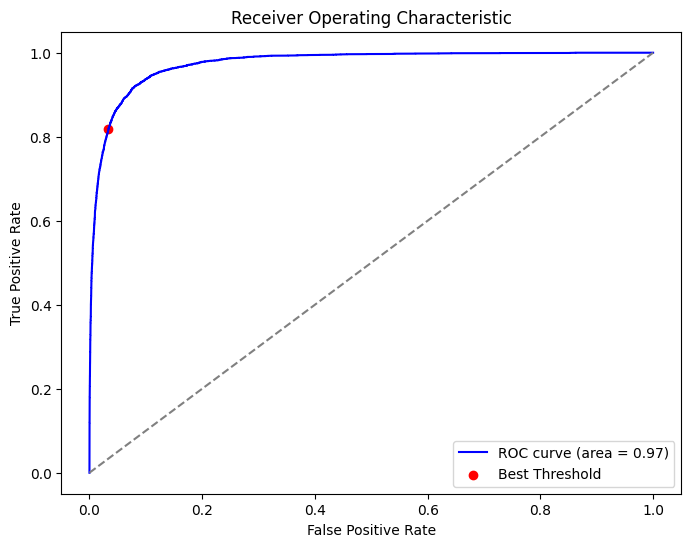

In [14]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

accuracy_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))

best_threshold = thresholds[np.argmax(accuracy_scores)]

print(f"Best Threshold (Max Accuracy): {best_threshold}")

y_pred_best_threshold = (y_pred_proba > best_threshold).astype(int)

accuracy_best_threshold = accuracy_score(y_test, y_pred_best_threshold)
roc_auc_best_threshold = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy (Best Threshold): {accuracy_best_threshold:.4f}")
print(f"ROC AUC (Best Threshold): {roc_auc_best_threshold:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc_best_threshold)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.scatter(fpr[np.argmax(accuracy_scores)], tpr[np.argmax(accuracy_scores)], marker='o', color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import numpy as np

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X, y)

y_pred_proba = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

accuracy_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    accuracy_scores.append(accuracy_score(y, y_pred_threshold))

best_threshold = thresholds[np.argmax(accuracy_scores)]

print(f"Best Threshold (Max Accuracy): {best_threshold}")

y_pred_best_threshold = (y_pred_proba > best_threshold).astype(int)

accuracy_best_threshold = accuracy_score(y, y_pred_best_threshold)
roc_auc_best_threshold = roc_auc_score(y, y_pred_proba)

print(f"Accuracy (Best Threshold): {accuracy_best_threshold:.4f}")
print(f"ROC AUC (Best Threshold): {roc_auc_best_threshold:.4f}")


Best Threshold (Max Accuracy): 0.4750619770504866
Accuracy (Best Threshold): 0.9380
ROC AUC (Best Threshold): 0.9736


In [22]:
test = pd.read_csv('process_test.csv')

In [27]:
X_test_f = test.drop(columns=['id', 'City', 'Degree', 'Profession'])

In [28]:
y_test_pred_proba = model.predict_proba(X_test_f)[:, 1]
y_test_f = (y_test_pred_proba > best_threshold).astype(int)
y_test_f

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
submission = pd.DataFrame({'id' : test['id'],
                           'Depression' : y_test_f})

In [30]:
# submission.to_csv('submission.csv', index=False)